# Introduction

In this notebook I was exploring and analyzing data from the Millennium Development Goals(MDG).A set of 8 Goals for 2015were defined by the United Nations to help improve living conditions and the condition of our planet.Key indicators were defined for each of the goals .In this project I had to work with Goal 7 which is to ensure environmental sustainability of carbon dioxide(CO2)emissions protected land and sea areas,and forests.I had to find the measure of central tendency,describe distributions and interpret it's histogram and know what outliers are and know how they affect measures of central tendency. 

### Importing needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from scipy.stats import stats
import warnings
warnings.filterwarnings("ignore")
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
%matplotlib inline

from itertools import chain

# Examining dataframe

In [2]:
stats = pd.read_csv("MDG_Export_20191227 (1).csv")
stats.head(3)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,...,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,...,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,...,,,,,,,,,,


In [3]:
#Replacing all empty string and records with only spaces nan
replacing_re = stats.replace(r'^\s*$', np.nan,regex = True)
replacing_re.head(1)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 95 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CountryCode   690 non-null    int64 
 1   Country       690 non-null    object
 2   SeriesCode    690 non-null    int64 
 3   MDG           690 non-null    object
 4   Series        690 non-null    object
 5   1990          689 non-null    object
 6   Footnotes     67 non-null     object
 7   Type          690 non-null    object
 8   1991          690 non-null    object
 9   Footnotes.1   508 non-null    object
 10  Type.1        690 non-null    object
 11  1992          690 non-null    object
 12  Footnotes.2   486 non-null    object
 13  Type.2        690 non-null    object
 14  1993          690 non-null    object
 15  Footnotes.3   486 non-null    object
 16  Type.3        690 non-null    object
 17  1994          690 non-null    object
 18  Footnotes.4   485 non-null    object
 19  Type.4  

# Checking Statistical summary

In [5]:
stats.describe()

,CountryCode,SeriesCode
count,690.000000,690.000000
mean,439.465217,644.000000
std,254.138802,76.949647
min,4.000000,567.000000
25%,222.000000,567.000000
50%,439.000000,616.000000
75%,660.000000,749.000000
max,894.000000,749.000000


In [6]:
#checking data type columns
stats.columns.to_series().groupby(stats.dtypes).groups

{dtype('int64'): Index(['CountryCode', 'SeriesCode'], dtype='object'),
 dtype('O'): Index(['Country', 'MDG', 'Series', '1990', 'Footnotes', 'Type', '1991',
        'Footnotes.1', 'Type.1', '1992', 'Footnotes.2', 'Type.2', '1993',
        'Footnotes.3', 'Type.3', '1994', 'Footnotes.4', 'Type.4', '1995',
        'Footnotes.5', 'Type.5', '1996', 'Footnotes.6', 'Type.6', '1997',
        'Footnotes.7', 'Type.7', '1998', 'Footnotes.8', 'Type.8', '1999',
        'Footnotes.9', 'Type.9', '2000', 'Footnotes.10', 'Type.10', '2001',
        'Footnotes.11', 'Type.11', '2002', 'Footnotes.12', 'Type.12', '2003',
        'Footnotes.13', 'Type.13', '2004', 'Footnotes.14', 'Type.14', '2005',
        'Footnotes.15', 'Type.15', '2006', 'Footnotes.16', 'Type.16', '2007',
        'Footnotes.17', 'Type.17', '2008', 'Footnotes.18', 'Type.18', '2009',
        'Footnotes.19', 'Type.19', '2010', 'Footnotes.20', 'Type.20', '2011',
        'Footnotes.21', 'Type.21', '2012', 'Footnotes.22', 'Type.22', '2013',
    

In [7]:
#Checking data types

stats.dtypes.value_counts()

object    93
int64      2
dtype: int64

# Cleaning And Preparing Data

In [8]:
# Removing columns that I don't need

for row in stats:
    if "Footnotes" in row:
        del stats[row]
    elif "Type" in row:
        del stats[row]
    elif "2016" in row:
        del stats[row]
    elif "2017" in row:
        del stats[row]
    elif "2018" in row:
        del stats[row]
    elif "2019" in row:
        del stats[row]
        
stats.head(1)        

,CountryCode,Country,SeriesCode,MDG,Series,1990,1991,1992,1993,1994,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,,,,,...,,,,,2.1,,,,,


# Checking duplicates

In [9]:
#Checking nunique values
stats.nunique()

CountryCode    230
Country        230
SeriesCode       3
MDG              1
Series           3
1990           516
1991           175
1992           199
1993           195
1994           194
1995           194
1996           199
1997           198
1998           204
1999           200
2000           569
2001           200
2002           205
2003           207
2004           208
2005           391
2006           208
2007           206
2008           206
2009           211
2010           387
2011           208
2012             1
2013             1
2014           202
2015             1
dtype: int64

In [10]:
corr = stats.corr()
corr.head(1)

,CountryCode,SeriesCode
CountryCode,1.0,-1.532248e-17


•There is a perfect negative relationship between Country code and Series code meaning they are inversely proportional.When on increases the other decreases.

In [11]:
#Checking the number of countries represented
country_name = replacing_re.Country.unique()

print("•Number of countries in dataframes =", len(country_name))

#sum of null values
print(f"•Number of missing values in dataframe = "
      ,replacing_re.isnull().any().sum())

#Checking missing values in the data frame
print(f"•Number of missing values in Country =",
      replacing_re["Country"].isnull().any().sum())

#Checking missing values in the data frame
print(f"•Number of missing values in Series=",
      replacing_re["Series"].isnull().any().sum())

#Creating a variable called year
year = replacing_re[["1990","1991","1992","1993","1994",
                     "1995","1996","1997","1998","1999",
                     "2000","2001","2002","2003","2004",
                     "2005","2006","2007","2008","2009",
                     "2010","2011","2012","2013","2014",
                     "2015"]]

#Checking missing values in series
print(f"•Number of missing values in year =",
      year.isnull().any().sum())

•Number of countries in dataframes = 230
•Number of missing values in dataframe =  90
•Number of missing values in Country = 0
•Number of missing values in Series= 0
•Number of missing values in year = 26


In [12]:
#Filling missing values with seriescode mean
stats_df = replacing_re.fillna(stats["CountryCode"].mean(),inplace = False)
stats_df.head(3)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,439.465,E,439.465,439.465217,...,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,439.465,G,2493.6,439.465217,...,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,439.465,C,439.465,439.465217,...,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217,439.465217


In [13]:
#Creating a new data frame for Country and 1990
stats_1990 = stats_df.loc[:, ("Country","1990") ]

#Grouping by country and 1990,then changing data type from object to float 
stat_1990 = stats_1990.groupby("Country")["1990"].apply(
    lambda country : country.astype(float).sum())

#Sorting my dataframe to see the bottom  countries in the 1990 column
stat_1990.reset_index().sort_values(["1990"],
                                     ascending = False)

,Country,1990
217,United States,4823599.85
41,China,2460773.08
100,Japan,1094358.17
92,India,690601.04
215,United Kingdom,555919.37
...,...,...
138,Namibia,43.22
67,Falkland Islands (Malvinas),36.94
104,Kiribati,36.81
186,Somalia,31.75


### Top 5 countries in 1990 and the amount of CO2 emisson

1.United States = 4823599.85

2.China = 2460773.08

3.Japan = 1094358.17

4.India = 690601.04

5.United Kingdom = 555919.37

### Bottom 5 countries in 1990 and the amount of CO2 emisson

1.Yemen = -2998.60

2.Somalia	= 31.75

3.Kiribati	= 36.81

4.Falkland Islands (Malvinas) =	36.94

5.Namibia =	43.22

# Data type summary

This data frame has 2 objects

In [14]:
#Dataframe stats summary
stats_1990.describe()

,Country,1990
count,690,690.000000
unique,230,516.000000
top,Niger,439.465217
freq,3,63.000000


In [15]:
#Creating a new data frame for country and year 2011
stats_2011 = stats_df.loc[:, ("Country","2011") ]

#Grouping by country and 2011,then changing data type from object to float 

stat_2011 = stats_2011.groupby("Country")["2011"].apply(lambda country : country.astype(float).sum())

#Reseting and sorting dataframe in the 2011 column
stat_2011.reset_index().sort_values( ["2011"],ascending = False)


,Country,2011
41,China,9.020397e+06
217,United States,5.306449e+06
92,India,2.075224e+06
166,Russian Federation,1.808952e+06
100,Japan,1.188536e+06
...,...,...
139,Nauru,9.302304e+02
115,Liechtenstein,9.302304e+02
224,Wallis and Futuna Islands,9.046304e+02
168,Saint Helena,8.899304e+02


### Top 5 countries in 2011 and the amount of CO2 emisson

1.China = 9019520.2

2.United States = 5305571.6

3.India = 2074346.9

4.Russian Federation = 2074346.9

5.Japan = 1187659.0

### Bottom 5 countries in 2011 and the amount of CO2 emisson

1.Saint Helena	= 889.9304

2.Niue	= 889.930434

3.Wallis and Futuna Islands =	904.630434

4.Liechtenstein =	930.230434

5.Nauru	= 930.230434


•The bottom 5 countries in 2011 had missing values.

•I replaced missing values with the CountryCode mean.

•I think in these countries there were no or CO2 emisions because they are not developed countries and so they don't use fossil fuels and there are a lot of forests there.

In [16]:
#Checking mean
print(f'•The mean or overall average = ',stat_1990.mean())

•The mean or overall average =  71805.40586389414


In [17]:
#Checking mean
print(f'•The mean or overall average = ',stat_1990.mean())

•The mean or overall average =  71805.40586389414


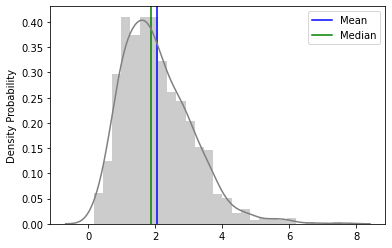

In [18]:
dist_df = stat_1990
dist_df = np.random.gamma(4, 0.5,1000)
mean = dist_df.mean()
median = np.median(dist_df)
plt.ylabel("Density Probability")
plt.axvline(mean,color = 'blue',label = 'Mean')
plt.axvline(median,color = 'green',label = 'Median')

_ = sns.distplot(dist_df,color = "grey")
_ = plt.legend()


In [19]:
stat_1990.skew()

10.537576282333625

•The mean is greater than the median, the distribution is positively skewed.

In [20]:
print(f'•The minimum value =',stat_1990.min())

•The minimum value = -2998.6


In [21]:
print(f'• The maximum value = ',stats_1990.max())

• The maximum value =  Country    Zimbabwe
dtype: object


In [22]:
#Finding the first quartile
q1 = stat_1990.quantile(0.25)
print(f"•The first quartile =",q1)

#Finding the third quartile
q3 = stat_1990.quantile(0.75)
print(f"•The third quartile =",q3)

#Finding the inter quartile range
iqr = q3 - q1
print(f"•Inter quartile range = ",iqr)

•The first quartile = 472.32021739130437
•The third quartile = 21386.615
•Inter quartile range =  20914.294782608697


•The distribution is skewed/ assymetrical distribution. 

•One tail is more than the other.

•This data is right-skewed because the right hand side has a longer tail than the left.

•If this was a normal distribution the mean and the median were gonna be equal.

•Now that the mean is more than the median it means that this distribution is positively(right-skewed)

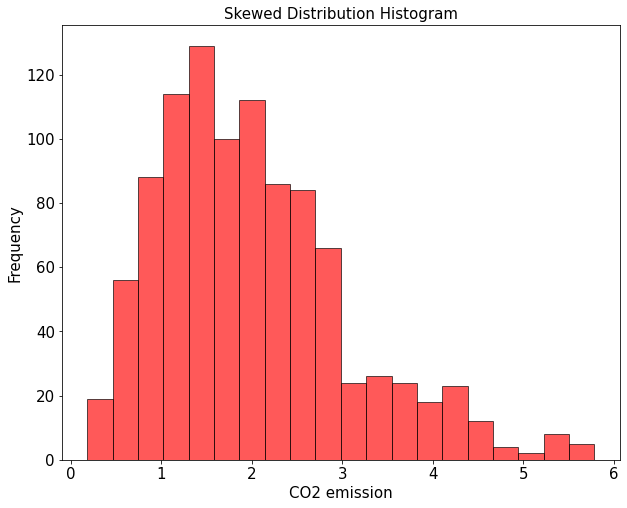

In [23]:
#Assigning new data frame
new_df = stat_1990

plt.figure(figsize = [10,8])
new_df = np.random.gamma(4, 0.5, 1000)

#Showing values specific points on coordinate axis 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#Showing specific labels on coordinate axis
plt.xlabel('CO2 emission', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


#Showing plot title
plt.title('Skewed Distribution Histogram',fontsize = 15)

plot = plt.hist(new_df, bins = 20, color='r',edgecolor = 'k', alpha = 0.65)

•Yes this is what I expected my histogram to look like because this distribution is skewed and it is positively distributed(right-skewed) as the tail is on the right.

In [24]:
print(f"•Standard deviation =",stat_1990.std())

•Standard deviation = 371343.4095625942


In [25]:
print(f"•Standard mean error = ", stat_1990.sem())

•Standard mean error =  24485.6593189789


•Standard deviation measures dispersion for a subject set of data from mean while standard error measures how far the sample mean of data is likely to be from true population mean.

In [26]:
#Locating countries
BRZ =replacing_re["Country"][replacing_re["Country"] == "Brazil"]
CHN = replacing_re["Country"][replacing_re["Country"] == "China"]
IND = replacing_re["Country"][replacing_re["Country"] == "India"]
RSA = replacing_re["Country"][replacing_re["Country"] == "South Africa"]
RSF = replacing_re["Country"][replacing_re["Country"] == "Russian Federation"]
USA = replacing_re["Country"][replacing_re["Country"] == "United States"]

#Displaying posotions of the countries 

display(BRZ,CHN,IND,RSA,RSF,USA)


81    Brazil
82    Brazil
83    Brazil
Name: Country, dtype: object

123    China
124    China
125    China
Name: Country, dtype: object

276    India
277    India
278    India
Name: Country, dtype: object

561    South Africa
562    South Africa
563    South Africa
Name: Country, dtype: object

498    Russian Federation
499    Russian Federation
500    Russian Federation
Name: Country, dtype: object

651    United States
652    United States
653    United States
Name: Country, dtype: object

In [27]:
#Creating a new data frame

all_df = replacing_re.loc[(82,124,277,563,499,652),("Country","1990","1991","1992","1993","1994","1995",
                                        "1996","1997","1998","1999","2000","2001","2002",
                                        "2003","2004","2005","2006","2007","2008","2009","2010",
                                        "2011","2012","2013","2014","2015")]

#Grouping and changing data types using callable function lambda
all_stats = all_df.groupby("Country")["1990","1991","1992","1993",
                                      "1994","1995","1996","1997",
                                      "1998","1999","2000","2001",
                                      "2002","2003","2004","2005",
                                      "2006","2007","2008","2009",
                                      "2010","2011","2012","2013",
                                      "2014","2015"].apply(
    lambda country : country.astype(float).sum()).reset_index()
all_stats

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Brazil,208887.00,219330.6,220705.7,230738.6,242154.0,258347.5,284782.9,300547.3,312289.1,...,347668.3,363212.7,387675.2,367147.4,419754.2,439412.9,0.0,0.0,0.00,0.0
1,China,2460744.00,2584538.3,2695982.1,2878694.0,3058241.3,3320285.2,3463089.1,3469510.0,3324344.5,...,6414463.1,6791804.7,7035443.9,7692210.9,8256969.2,9019518.2,0.0,0.0,0.00,0.0
2,India,690576.80,737851.7,783634.2,814297.7,864931.6,920046.6,1002224.1,1043939.9,1071911.8,...,1504364.7,1611199.1,1793075.0,1965820.0,1950950.3,2074344.9,0.0,0.0,0.00,0.0
3,Russian Federation,0.00,0.0,2081840.2,1941203.5,1701132.3,1634312.2,1615804.9,1528849.3,1498343.5,...,1669618.1,1667597.6,1715639.0,1574367.8,1742540.1,1808073.0,0.0,0.0,0.00,0.0
4,South Africa,2.58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.24,0.0
5,United States,4823557.10,4822383.7,4911103.1,5032931.8,5098475.8,5138009.7,5260696.5,5375235.3,5410918.9,...,5703871.8,5794923.4,5622464.4,5274132.4,5408869.0,5305569.6,0.0,0.0,0.00,0.0


In [28]:
all_stats.dtypes.value_counts()

float64    26
object      1
dtype: int64

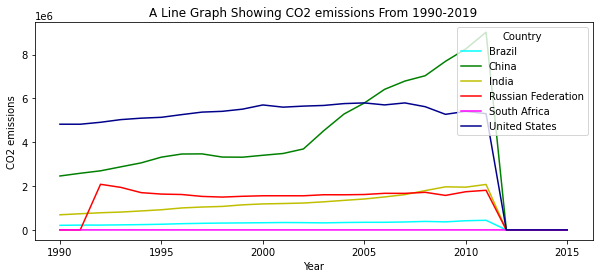

In [29]:
#Firstly I need to transpose my data set
all_stat = all_stats.set_index("Country").T

#Plot setting
fig, ax = plt.subplots(figsize = (10,4))
ax.set_xlabel("Year")
ax.set_ylabel("CO2 emissions")
ax.set_title("A Line Graph Showing CO2 emissions From 1990-2019")

_ = all_stat.plot(ax = ax, color = ("cyan","g", "y","r", "fuchsia","darkblue"))
 

In [30]:
statis = replacing_re[((replacing_re.SeriesCode == 567))]
statis.head(1)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
forest = statis.loc[:, ('Country','1990') ]
forest.head(2)

,Country,1990
0,Afghanistan,2.1
3,Albania,28.8


In [32]:
forest.describe()

,Country,1990
count,230,223
unique,230,178
top,Niger,0
freq,1,13


In [33]:
forest.dtypes

Country    object
1990       object
dtype: object

In [34]:
#Changing 1990 from string to float and finding mean

print(f"•Mean of area covered by forest in 1990= ",
      forest["1990"].astype(float).mean())

#Changing 1990 from string to float and finding standard deviation

print(f"•Standard deviation of area covered by forest in 1990 =",
      forest["1990"].astype(float).std())

•Mean of area covered by forest in 1990=  32.97713004484305
•Standard deviation of area covered by forest in 1990 = 25.497512099375246


•A high standard deviation indicates that the data points are spread out over a large range of values.

In [35]:
statist = replacing_re[((replacing_re.SeriesCode == 616))]
statist.head(1)

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
protected = statist.loc[:, ('Country','1990') ]
protected

,Country,1990
2,Afghanistan,0.36
5,Albania,0.15
8,Algeria,5.97
11,American Samoa,0.06
14,Andorra,5.53
...,...,...
677,Western Sahara,0
680,Yemen,0
683,Yugoslavia [former Socialist Federal Republic],NaN
686,Zambia,36.05


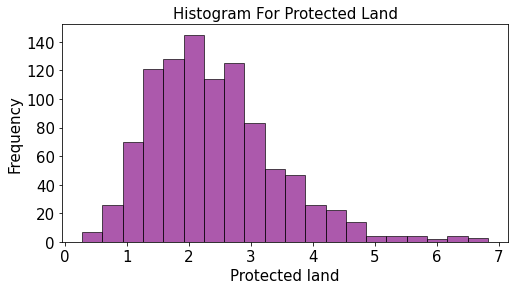

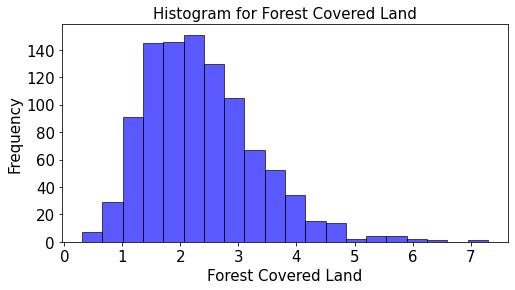

In [37]:
new_df = protected
#Defining the measures of central tendency
mean = new_df.mean()
median = new_df.median()
fig, axes = plt.subplots(1, 1, figsize=(8, 4))
new_df = np.random.gamma(6, 0.4, 1000)
#new_df = np.random.gamma(1000)

#Showing values specific points on coordinate axis 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#Showing specific labels on coordinate axis
plt.xlabel('Protected land', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


#Showing plot title
plt.title('Histogram For Protected Land',fontsize = 15)

plot = plt.hist(new_df.astype(float), bins = 20,
                color='purple',edgecolor = 'k', alpha = 0.65)

new_df = forest
#Defining the measures of central tendency
mean = new_df.mean()
median = new_df.median()

fig, axes = plt.subplots(1, 1, figsize=(8, 4))
new_df = np.random.gamma(6, 0.4, 1000)
#new_df = np.random.gamma(1000)

#Showing values specific points on coordinate axis 
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

#Showing specific labels on coordinate axis
plt.xlabel('Forest Covered Land', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)


#Showing plot title
plt.title('Histogram for Forest Covered Land',fontsize = 15)

plot = plt.hist(new_df.astype(float), 
                bins = 20, color='blue',edgecolor = 'k', alpha = 0.65)

•Both graphs are positively skew dostributed meaning the mean value is more than the median value.

In [38]:
#Creating a data frame for forest land and resetting the index while droping the old index

forest_df = statis.loc[:, ("Country","2000") ].reset_index(drop = True)
forest_df.drop("Country", axis =1)

#Creating dataframe for protected land

protected_df = statist.loc[:, ("Country","2000") ].reset_index(drop = True)
protected_df = protected_df.drop("Country", axis =1)

#Concatenating forest and protected
result = pd.concat([forest_df, protected_df["2000"]], axis = 1).fillna(0)

#Renaming columns

result.columns = ["Country", "forest", "protected"]
result.head()

,Country,forest,protected
0,Afghanistan,2.1,0.36
1,Albania,28.1,0.48
2,Algeria,0.7,5.98
3,American Samoa,90,0.06
4,Andorra,35.6,9.25


In [39]:
result.dtypes

Country      object
forest       object
protected    object
dtype: object

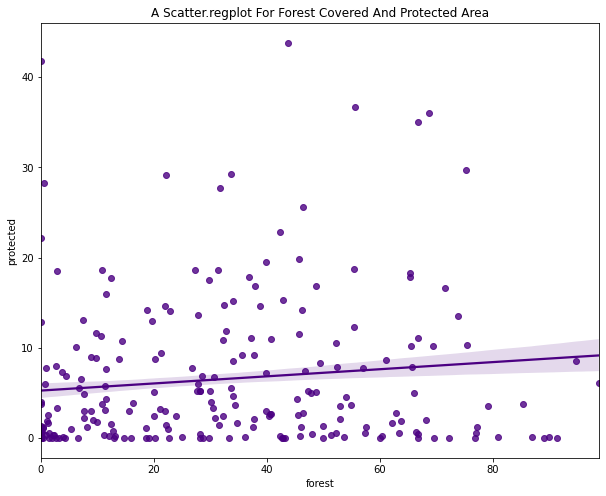

In [40]:
#Ploting a regression scatter plot
plt.figure(figsize=(10,8))
sns.regplot(data = result, x = result["forest"].astype(float), y = result["protected"].astype(float),ci = 68,color = "indigo")
_ = plt.title("A Scatter.regplot For Forest Covered And Protected Area"
             )

In [41]:
corre = result.drop("Country",axis = 1).astype(float).corr()
corre.head(1)

,forest,protected
forest,1.0,0.1192


•There is a weak,positive,linear relationship or no relationship(this relationship is negligible) the proportion of land area covered by forest and the percentage of area protected in 2000.

•The correction value is more than zero but less than 0.3.

•Since the r value is so close to zero we can say that there is no relationship between the variables.
•Even though both variables increase in the same direction but they do not increase simultaneously.

•Yes,I notice unusual values and they are called outliers.

•Outliers are observations with larger residuals.

•Outliers are the points that don't appear to fit, assuming that all the other points are valid.

•They can either indicate measurement error or heavily tailed distribution.

### There are three types of outliers namely:

 #### 1.Global Outliers
 •It's the values that are far outside the entire dataset.
 
 #### 2.Contextual Outliers 
 •These significantly deviates from the rest of the data points in the same context.
 
 #### 3.Collective Outliers
 •This is when a collection of related data instances is anomalous/inconsistent with respect to the entire dataset.

In [42]:
result_log = result
result_log['log_protected'] = np.log10(result['protected'].astype(float))
result_log['log_forest'] = np.log10(result['forest'].astype(float))

#Dropping protected and forest columns to be left with transformed columns
transformed = result_log.drop(["forest","protected"], axis = 1)

# Removing infinite
transform = transformed[~transformed.isin([np.nan, np.inf, -np.inf]).any(1)]
transform.head(4)

,Country,log_protected,log_forest
0,Afghanistan,-0.443697,0.322219
1,Albania,-0.318759,1.448706
2,Algeria,0.776701,-0.154902
3,American Samoa,-1.221849,1.954243


In [43]:
transform.dtypes


Country           object
log_protected    float64
log_forest       float64
dtype: object

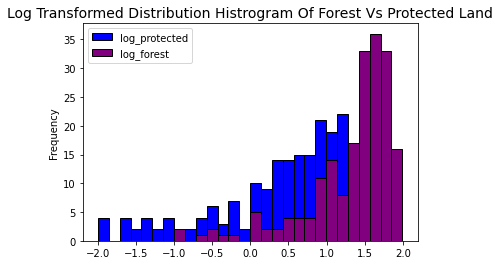

In [44]:
#Dropping country column to be left with numerical columns
transform_df = transform.drop(["Country"], axis = 1)

#Ploting log transformed histogram
_= transform_df.plot( kind = "hist", bins = 28,edgecolor = 'k',color = ("blue", "purple"))
_ = plt.title("Log Transformed Distribution Histrogram Of Forest Vs Protected Land", fontsize = 14)

In [45]:
pearsoncorr = transform_df.corr(method='pearson')
pearsoncorr.head(1)

,log_protected,log_forest
log_protected,1.0,0.104388


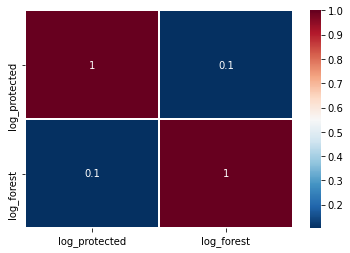

In [46]:
ax = sns.heatmap(pearsoncorr, cmap = 'RdBu_r',annot = True,linewidth = 0.5)

•The coefficient of correlation is more than zero but less than one,this means that there is a weak positive relationship between the values.

•This means that while both variables tend to go up in response to one another, the relationship is not very strong.

## Hypothesis Testing

•Null Hypothesis : There is no statistical significance correlation between forest covered area and protected land.

•Alternate Hypothesis : There is a statistical significance correlation  between forest covered area and protected land.

In [47]:
#checking p-values of log transformed variable
x = transform_df["log_protected"]
y = transform_df["log_forest"]
print(f'•The p-values of transformed forest and protected land =',
 pearsonr(x,y))
#checking p-values of 1990 variables
a = result["forest"].astype(float)
b = result["protected"].astype(float)
print(f'•The p-values of forest and protected land =',
      pearsonr(a,b))

•The p-values of transformed forest and protected land = (0.10438782531850192, 0.14537527879965917)
•The p-values of forest and protected land = (0.11920001063709554, 0.07117697693840744)


•There is no relationship between the variables in both cases.

•The variables move in the same positive direction(increase) but they do not increase simultaneously or at the same rate.

•This means that the variables do not depend on each other,when one increase the other does not increase.

•The p-values are more than the significance level (α =0.05),so we accept our null hypothesis and conclude that the correlation is not statically significant.

•We can also conclude that there is not a significant linear correlation between  forest covered area and protected land in the population.

In [48]:
print(f'•Results for log transformed data are',spearmanr(x,y))

print(f'•Results for 1990 data are',spearmanr(a,b))

•Results for log transformed data are SpearmanrResult(correlation=0.08735845515766967, pvalue=0.22340468822298457)
•Results for 1990 data are SpearmanrResult(correlation=0.17058160267763375, pvalue=0.009543986403932071)


•There is no significance because the p-value is more than 5%.

•There is no monotonic relationship because the correlation is close to zero.

### Conclusion

There is no relationship between the proportion of land area covered by forest and the percentage of area protected in population.Or there is a very weak positive relationship.And this is statistically not significant.